# imported necessary libraries


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

# load the data

In [2]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weatherHistory.csv')

# EDA and Preprocessing

In [3]:
# gives first five rows
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [4]:
# gives last five rows
df.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39,15.5204,1016.16,Partly cloudy starting in the morning.


In [5]:
# there are 96453 rows and 11 columns
df.shape

(96453, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


there are 4 categorical values and 7 numerical values

In [7]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [8]:
df.isna().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Pressure (millibars),0


only precip type has missing values, rest of the data there are no null values.

In [9]:
df['Precip Type'].fillna(df['Precip Type'].mode()[0], inplace=True)

filled the missing values in precip type


In [10]:
df.isna().sum()

,0
Formatted Date,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Pressure (millibars),0


In [11]:
df.duplicated().sum()

np.int64(24)

there are duplicate values in this dataset

In [12]:
df.drop_duplicates(inplace=True)

duplicate values removed

In [13]:
df.nunique()

,0
Formatted Date,96429
Summary,27
Precip Type,2
Temperature (C),7574
Apparent Temperature (C),8984
Humidity,90
Wind Speed (km/h),2484
Wind Bearing (degrees),360
Visibility (km),949
Pressure (millibars),4979


shows us unique values in each columns


Text(0.5, 1.0, 'correlation matrix')

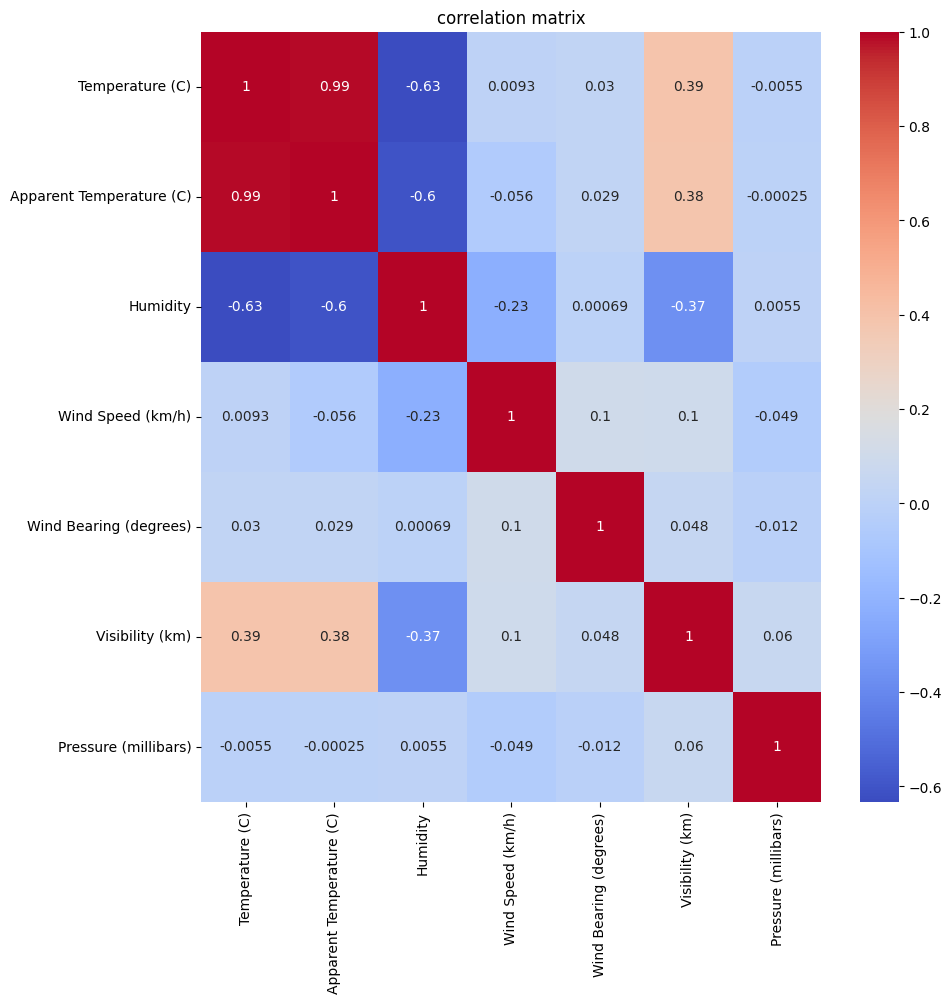

In [14]:
# correlation heatmap
co = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(co,annot=True, cmap='coolwarm')
plt.title('correlation matrix')

1. Temperature (C) vs. Apparent Temperature (C):Correlation: 0.99 (very strong positive correlation).

2. Humidity vs. Temperature/Apparent Temperature:Correlation: -0.63 and -0.60 respectively

3. Visibility vs. Temperature/Apparent Temperature:Correlations: 0.39 and 0.38(moderate correlation)

<Axes: xlabel='Humidity', ylabel='Temperature (C)'>

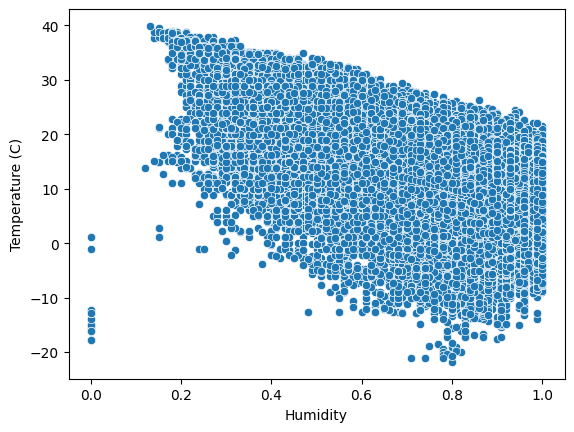

In [15]:
sns.scatterplot(x='Humidity', y='Temperature (C)', data=df)


<Axes: xlabel='Wind Speed (km/h)', ylabel='Visibility (km)'>

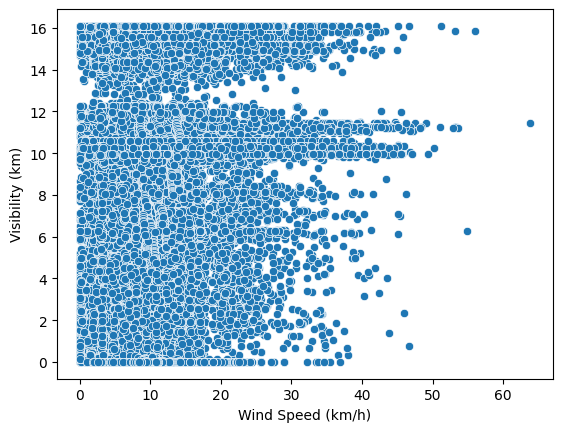

In [16]:
sns.scatterplot(x='Wind Speed (km/h)', y='Visibility (km)', data=df)

In [17]:
df.dtypes

,0
Formatted Date,object
Summary,object
Precip Type,object
Temperature (C),float64
Apparent Temperature (C),float64
Humidity,float64
Wind Speed (km/h),float64
Wind Bearing (degrees),int64
Visibility (km),float64
Pressure (millibars),float64


<Axes: xlabel='Precip Type', ylabel='count'>

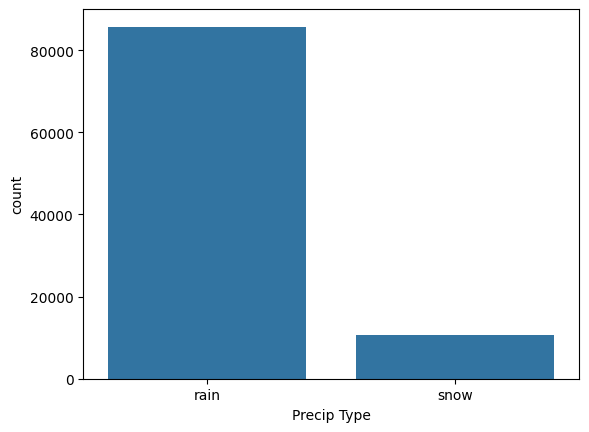

In [18]:
sns.countplot(x='Precip Type', data=df)

In [19]:
df['Precip Type'].value_counts()

,count
Precip Type,
rain,85717
snow,10712


<Axes: xlabel='Temperature (C)'>

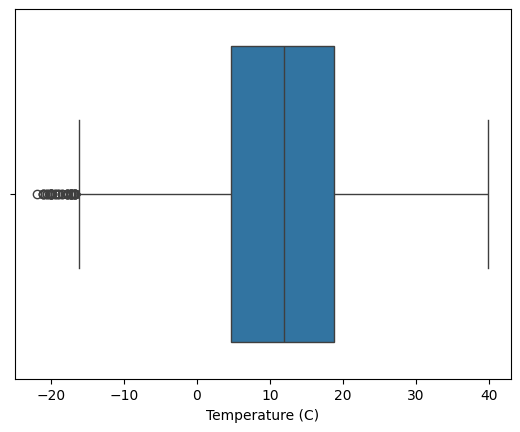

In [20]:
sns.boxplot(x='Temperature (C)', data=df)

there are outliers in Temperature(c)

<Axes: xlabel='Humidity'>

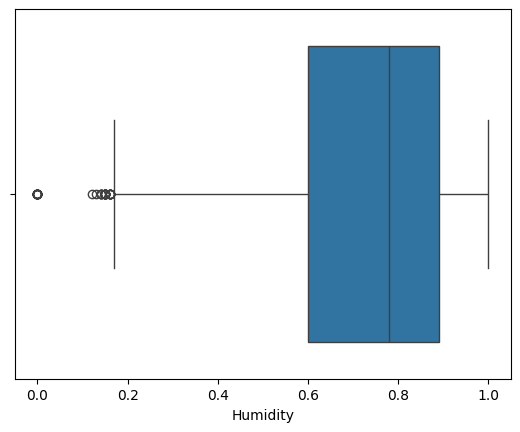

In [21]:
sns.boxplot(x='Humidity', data=df)

there are outliers in Humidity

<Axes: xlabel='Wind Speed (km/h)'>

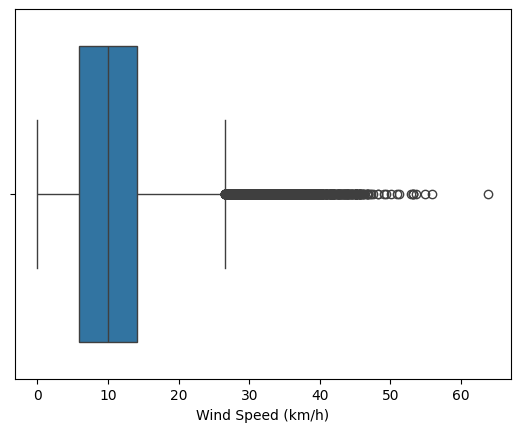

In [22]:
sns.boxplot(x='Wind Speed (km/h)', data=df)

there are outliers in Wind Speed(km/h)

<Axes: xlabel='Visibility (km)'>

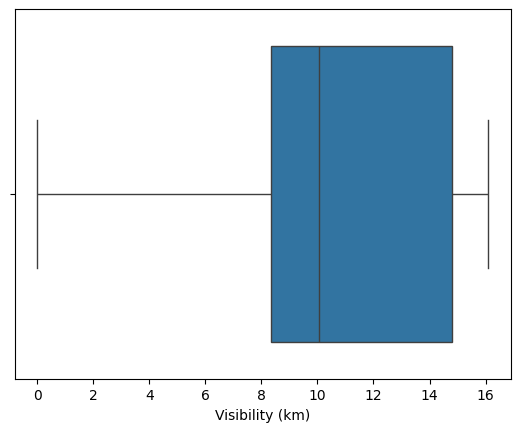

In [23]:
sns.boxplot(x='Visibility (km)', data=df)

there are no outliers in Visibility

<Axes: xlabel='Apparent Temperature (C)'>

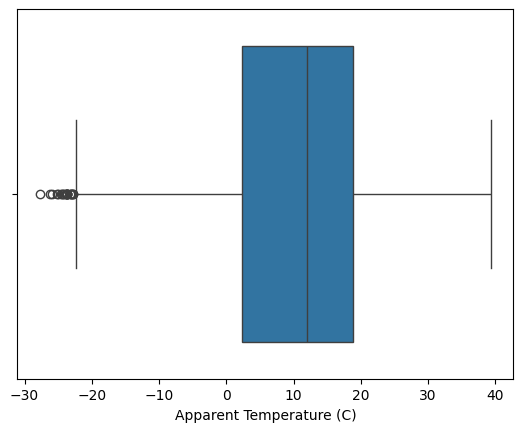

In [24]:
sns.boxplot(x='Apparent Temperature (C)', data=df)

there are outliers in Appparent Temperature(c)

<Axes: xlabel='Wind Bearing (degrees)'>

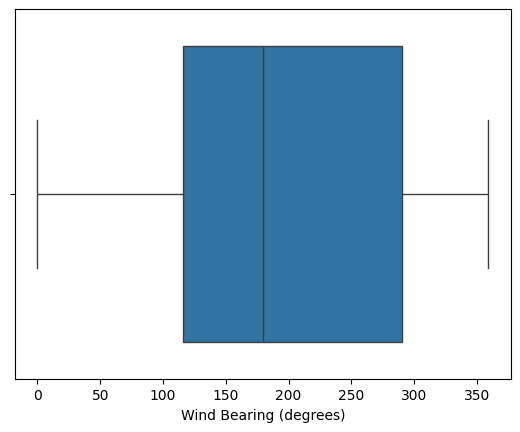

In [25]:
sns.boxplot(x='Wind Bearing (degrees)', data=df)

there are no outliers in Wind Bearing(degrees)

As you can see there are outliers in temperature (C), Humidity, Wind Speed (km/h), Apparent Temperature (C) but we are going to keep them cause we want a complete picture of the weather behavior, including rare but real extreme events (like heatwaves, storms, or cold spells).

In [26]:
df['Summary'].unique()


array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

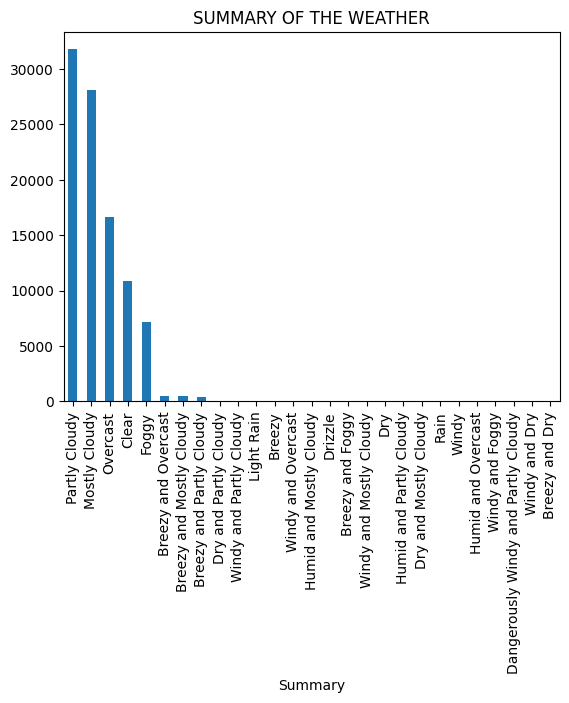

In [27]:
df['Summary'].value_counts().plot(kind='bar')
plt.title('SUMMARY OF THE WEATHER')
plt.show()

In [28]:
df['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

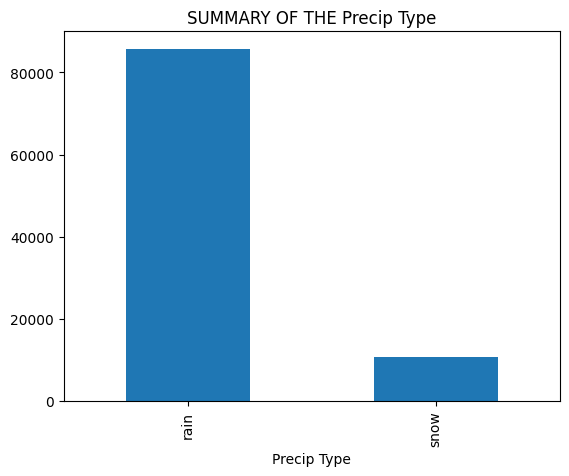

In [29]:
df['Precip Type'].value_counts().plot(kind='bar')
plt.title('SUMMARY OF THE Precip Type')
plt.show()

In [30]:

# Convert 'Formatted Date' to datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True )

df['Year'] = df['Formatted Date'].dt.year
df['Month'] = df['Formatted Date'].dt.month
df['Day'] = df['Formatted Date'].dt.day
df['Day_of_Week'] = df['Formatted Date'].dt.dayofweek
df['Week_of_Year'] = df['Formatted Date'].dt.isocalendar().week
df['Day_of_Year'] = df['Formatted Date'].dt.dayofyear

# Droped the original 'Formatted Date' column
df = df.drop(columns=['Formatted Date'])

# updated DataFrame to check the new columns
print(df.head())

         Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
0  Partly Cloudy        rain         9.472222                  7.388889   
1  Partly Cloudy        rain         9.355556                  7.227778   
2  Mostly Cloudy        rain         9.377778                  9.377778   
3  Partly Cloudy        rain         8.288889                  5.944444   
4  Mostly Cloudy        rain         8.755556                  6.977778   

   Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0      0.89            14.1197                     251          15.8263   
1      0.86            14.2646                     259          15.8263   
2      0.89             3.9284                     204          14.9569   
3      0.83            14.1036                     269          15.8263   
4      0.83            11.0446                     259          15.8263   

   Pressure (millibars)                      Daily Summary  Year  Month  Day  \
0               10

In [31]:
# Specify the desired order of columns
date_cols = ['Year', 'Month', 'Day', 'Day_of_Week', 'Week_of_Year', 'Day_of_Year']
other_cols = [col for col in df.columns if col not in date_cols]
new_column_order = date_cols + other_cols

# Reorder the DataFrame
df = df[new_column_order]

# Check the updated column order
print(df.head())


   Year  Month  Day  Day_of_Week  Week_of_Year  Day_of_Year        Summary  \
0  2006      3   31            4            13           90  Partly Cloudy   
1  2006      3   31            4            13           90  Partly Cloudy   
2  2006      4    1            5            13           91  Mostly Cloudy   
3  2006      4    1            5            13           91  Partly Cloudy   
4  2006      4    1            5            13           91  Mostly Cloudy   

  Precip Type  Temperature (C)  Apparent Temperature (C)  Humidity  \
0        rain         9.472222                  7.388889      0.89   
1        rain         9.355556                  7.227778      0.86   
2        rain         9.377778                  9.377778      0.89   
3        rain         8.288889                  5.944444      0.83   
4        rain         8.755556                  6.977778      0.83   

   Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0            14.1197                     251 

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
# Encode the target labels
le = LabelEncoder()
df['Summary'] = le.fit_transform(df['Summary'])

In [34]:
df['Daily Summary']=le.fit_transform(df['Daily Summary'])

In [35]:
df['Precip Type']=le.fit_transform(df['Precip Type'])

In [36]:
df.dtypes

,0
Year,int32
Month,int32
Day,int32
Day_of_Week,int32
Week_of_Year,UInt32
Day_of_Year,int32
Summary,int64
Precip Type,int64
Temperature (C),float64
Apparent Temperature (C),float64


In [37]:
class_counts = df['Summary'].value_counts()

In [38]:
# Filter out classes with <2 samples
valid_classes = class_counts[class_counts > 1].index
df = df[df['Summary'].isin(valid_classes)]

In [39]:
#separating feature variables and target variables
X=df.drop(['Summary'],axis=1)
y=df['Summary']

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
# standardizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

# spliting the data into training and testing set

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y )

In [44]:
y_train.value_counts()

,count
Summary,
19,25381
17,22475
18,13278
6,8698
12,5718
4,422
3,413
5,309
11,69


data is inbalance so we are going to use randomeoversampling

In [45]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [47]:
y_resampled.value_counts()

,count
Summary,
17,25381
12,25381
19,25381
18,25381
6,25381
0,25381
9,25381
5,25381
3,25381


I used RandomOverSampler (random oversampling) because it's a simple, effective starting point for handling class imbalance—especially in multi-class classification problems.

# model selection

1. Random Forest: Easy to use, handles missing or noisy data well.

2. Gradient Boosting: More accurate than Random Forest in many cases, good for complex patterns.


3. SVM: Great for clear class separation.

# Random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
RF=RandomForestClassifier(n_estimators=100, random_state=42)

In [50]:
RF.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [51]:
y_pred=RF.predict(X_test)

In [52]:
classification_report=classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           2       1.00      0.57      0.73         7
           3       0.56      0.56      0.56       103
           4       0.68      0.78      0.73       106
           5       0.69      0.77      0.72        77
           6       0.71      0.72      0.71      2175
           8       0.75      0.38      0.50         8
           9       0.50      0.29      0.36         7
          10       0.40      0.67      0.50         3
          11       0.46      0.35      0.40        17
          12       1.00      1.00      1.00      1430
          13       1.00      0.12      0.22         8
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         3
          16       0.69      0.69      0.69        13
          17       0.69      0.66      0.67      5619
          18       0.76      0.78      0.77      3319
          19       0.73    

In [53]:
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[   8    0    1    0    0    2    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0    0    3    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0   58   26   17    0    0    0    0    1    0    0    0    0
     0    0    1    0    0    0    0    0    0    0]
 [   0    0   20   83    2    0    0    0    0    0    0    0    0    0
     0    1    0    0    0    0    0    0    0    0]
 [   0    0   14    2   59    0    0    0    0    0    0    0    0    0
     0    0    0    2    0    0    0    0    0    0]
 [   0    0    0    0    1 1571    0    0    0    0    2    0    0    0
     0   73   29  499    0    0    0    0    0    0]
 [   0    0    0    0    0    0    3    0    0    0    0    0    0    0
     3    1    0    1    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    2    0    2    0    0    0    0
     0    0    0    3    0    0    0    0    0    0]


# Gradient Boosting

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
GB=GradientBoostingClassifier(n_estimators=100, random_state=42)

In [56]:
GB.fit(X_resampled, y_resampled)

GradientBoostingClassifier(random_state=42)

In [57]:
y_pred=GB.predict(X_test)

In [58]:
classification_report=classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.57      0.73      0.64        11
           2       1.00      0.86      0.92         7
           3       0.50      0.51      0.51       103
           4       0.65      0.74      0.69       106
           5       0.58      0.75      0.66        77
           6       0.49      0.70      0.58      2175
           8       0.12      0.38      0.18         8
           9       0.09      0.43      0.15         7
          10       0.22      0.67      0.33         3
          11       0.08      0.94      0.15        17
          12       1.00      1.00      1.00      1430
          13       0.04      0.38      0.08         8
          14       0.00      0.00      0.00         1
          15       0.10      0.67      0.17         3
          16       0.39      1.00      0.57        13
          17       0.57      0.43      0.49      5619
          18       0.53      0.70      0.60      3319
          19       0.66    

In [59]:
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[   8    0    0    1    2    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    6    0    0    0    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   1    0   53   24   24    0    0    0    0    1    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   2    0   21   78    5    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0   17    2   58    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0 1531    1   11    0   14    2    2    0    1
     1  131  152  328    0    0    0    0    0    0]
 [   0    0    0    0    0    0    3    0    0    0    0    0    0    0
     4    0    0    1    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    3    0    4    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]


# SVM

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
svm = SVC(random_state=42)


In [62]:
svm.fit(X_resampled, y_resampled)

SVC(random_state=42)

In [63]:
y_pred = svm.predict(X_test)

In [64]:
classification_report=classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.47      0.64      0.54        11
           2       1.00      0.86      0.92         7
           3       0.41      0.57      0.48       103
           4       0.53      0.70      0.60       106
           5       0.49      0.68      0.57        77
           6       0.43      0.61      0.51      2175
           8       0.15      0.75      0.26         8
           9       0.12      0.57      0.20         7
          10       0.16      1.00      0.27         3
          11       0.08      0.76      0.15        17
          12       0.89      1.00      0.94      1430
          13       0.03      0.38      0.05         8
          14       0.00      0.00      0.00         1
          15       0.02      0.33      0.04         3
          16       0.23      0.92      0.36        13
          17       0.56      0.36      0.43      5619
          18       0.50      0.68      0.57      3319
          19       0.65    

In [65]:
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[   7    0    0    0    1    2    0    0    0    0    1    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    6    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   1    0   59   19   21    0    0    0    0    1    0    0    0    0
     0    0    0    0    0    0    0    1    1    0]
 [   1    0   25   74    4    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    2    0]
 [   2    0   16    4   52    1    0    0    0    0    0    0    0    0
     0    0    0    2    0    0    0    0    0    0]
 [   1    0    0    0    2 1331    5   10    0   18   33    7    0    5
     4  125  200  434    0    0    0    0    0    0]
 [   0    0    0    0    0    0    6    0    0    0    0    0    0    0
     0    1    0    1    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    4    0    3    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]


# hyper tuning the best model

# randome forest

In [66]:
RF=RandomForestClassifier( random_state=42)

In [67]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [68]:
# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=RF,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')

In [69]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [70]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.7339771843401607


#Comparison Chart

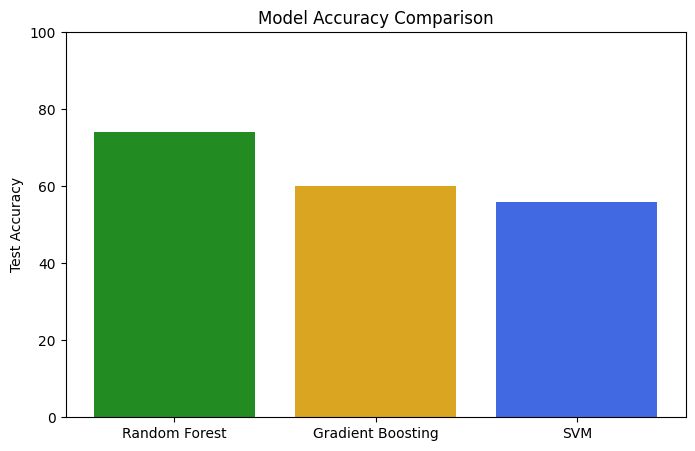

In [71]:

RF_accuracy = 74
GB_accuracy = 60
SVM_accuracy = 56

models = ['Random Forest', 'Gradient Boosting', 'SVM']
accuracies = [RF_accuracy, GB_accuracy, SVM_accuracy]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['forestgreen', 'goldenrod', 'royalblue'])
plt.ylim(0, 100)
plt.ylabel('Test Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

# conclusion

among all the three algorithmns we have train random forest has the highest accuracy of 74% so we will go with random forest for this data

# save the model

In [72]:
import joblib


joblib.dump(RF, 'weather_model.pkl')


['weather_model.pkl']

In [73]:
from joblib import dump

# Save the trained label encoder
dump(le, 'label_encoder.joblib')


['label_encoder.joblib']